# 2. Text

Nothing tells a story like... text! Sometimes, it's the only available tool to tell a story. Multiplex provides visualizations that automatically organize text-only visualizations, allowing you to focus on annotating it.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import nltk
import os
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

In [2]:
paragraph = "Anthony Lopes is a Portuguese professional footballer who plays for \
Olympique Lyonnais as a goalkeeper. He came through the youth ranks at Lyon, being \
called to the first team in 2011 and making his debut the following year."

sentence = "Anthony Lopes is a Portuguese professional footballer."

As explained in [1. Getting started](1.%20Getting%20started.ipynb), all visualizations revolve around the Drawable class. The text annotation visualization is no exception, so first, we create a Drawable instance from a figure.

The text annotation visualization expects a list of tokens. Commonly, these are words or punctuation marks. Given just a list of tokens, the visualization lays them out as a sentence or as a paragraph.

The visualization uses the figure size to automatically segment the text into lines. You can align lines to the _left_ or _right_ or _justify_ them using the `align` argument.

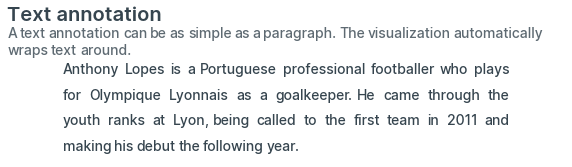

In [3]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))

viz = drawable.Drawable(plt.figure(figsize=(10,10)))

tokens = nltk.word_tokenize(paragraph)
viz.draw_text_annotation(tokens, align='justify', lineheight=1.25, lpad=0.1, rpad=0.1)

viz.set_title('Text annotation', loc='left')
viz.set_caption('A text annotation can be as simple as a paragraph. The visualization automatically wraps text around.')
plt.show()

Not all text is equal. What if you want to draw attention to a phrase? After all, isn't a visualization supposed to tell a story? The text annotation visualization allows you to highlight words by choosing how they appear.

In the next example, named entities are highlighted. Differently from before, instead of providing a list of tokens, annotated tokens are represented as a `dict`. The text occupies the `text` key and the style is in the `style` key.

In [4]:
tokens = nltk.word_tokenize(paragraph)
pos_tags = nltk.pos_tag(tokens)
chunks = [ entity for entity in nltk.ne_chunk(pos_tags, binary=True) ]

tokens = []
for chunk in chunks:
    if type(chunk) == nltk.tree.Tree:
        for entity_chunk in chunk:
            entity, _ = entity_chunk
            tokens.append({
                'style': {
                    'facecolor': '#FFBF00' #amber
                },
                'text': entity,
            })
    else:
        token, _ = chunk
        tokens.append(token)

tokens

[{'style': {'facecolor': '#FFBF00'}, 'text': 'Anthony'},
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Lopes'},
 'is',
 'a',
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Portuguese'},
 'professional',
 'footballer',
 'who',
 'plays',
 'for',
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Olympique'},
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Lyonnais'},
 'as',
 'a',
 'goalkeeper',
 '.',
 'He',
 'came',
 'through',
 'the',
 'youth',
 'ranks',
 'at',
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Lyon'},
 ',',
 'being',
 'called',
 'to',
 'the',
 'first',
 'team',
 'in',
 '2011',
 'and',
 'making',
 'his',
 'debut',
 'the',
 'following',
 'year',
 '.']

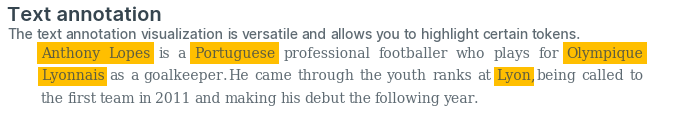

In [5]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))
viz = drawable.Drawable(plt.figure(figsize=(12,10)))

viz.draw_text_annotation(tokens, align='justify', alpha=0.8, fontfamily='serif', lpad=0.05, rpad=0.05)

viz.set_title('Text annotation', loc='left')
viz.set_caption('The text annotation visualization is versatile and allows you to highlight certain tokens.')
plt.savefig('exports/text-annotation.png', dpi=300, bbox_inches='tight')

Although you can style text tokens individually, you can still style all tokens at the same time by passing keyword arguments. These are passed on to the drawn tokens. The attributes of styled tokens take precedence and overwrite the keyword arguments.

In [6]:
tokens = nltk.word_tokenize(paragraph)
pos_tags = nltk.pos_tag(tokens)
chunks = [ entity for entity in nltk.ne_chunk(pos_tags, binary=True) ]

tokens = []
for chunk in chunks:
    if type(chunk) == nltk.tree.Tree:
        for entity_chunk in chunk:
            entity, _ = entity_chunk
            tokens.append({
                'text': entity,
                'style': { 'alpha': 1.0 }
            })
    else:
        token, _ = chunk
        tokens.append(token)


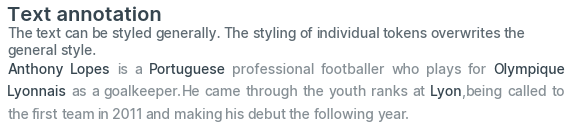

In [7]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire.style"))
viz = drawable.Drawable(plt.figure(figsize=(10,10)))

viz.draw_text_annotation(tokens, align='justify', alpha=0.6)

viz.set_title('Text annotation', loc='left')
viz.set_caption('The text can be styled generally. The styling of individual tokens overwrites the general style.')
plt.show()

The text annotation visualization can create a legend if labels are given. The legend labels are drawn only once on the first time the label is encountered.

In [8]:
tokens = nltk.word_tokenize(paragraph)
pos_tags = nltk.pos_tag(tokens)

tokens = []
for text, pos in pos_tags:
    if pos.startswith('NN'):
        tokens.append({
            'label': 'Noun',
            'style': {
                'color': 'white',
                'facecolor': 'C0'
            },
            'text': text,
        })
    elif pos.startswith('V'):
        tokens.append({
            'label': 'Verb',
            'style': {
                'color': 'white',
                'facecolor': 'C2'
            },
            'text': text,
        })
    elif pos.startswith('JJ'):
        tokens.append({
            'label': 'Adjective',
            'style': {
                'color': 'white',
                'facecolor': 'C1'
            },
            'text': text,
        })
    else:
        tokens.append(text)

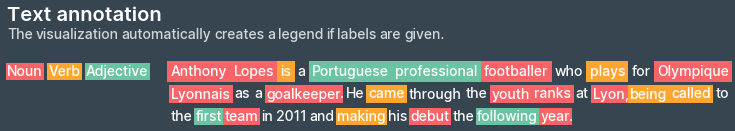

In [9]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "fire-dark.style"))
viz = drawable.Drawable(plt.figure(figsize=(10,10)))

viz.draw_text_annotation(tokens, align='justify')

viz.set_title('Text annotation', loc='left')
viz.set_caption('The visualization automatically creates a legend if labels are given.')
plt.show()